## Performing Exploratory Data Analysis (EDA)

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('D:\mlops\data\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Evaluate the dataset information

In [8]:
# shape of the dataset
print("Shape of the dataset:", df.shape)


Shape of the dataset: (768, 9)


In [9]:
# column names and data types
print("\nColumn names:\n", df.columns)


Column names:
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [10]:
#data types
print("\nData types:\n", df.dtypes)


Data types:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [11]:
# Evaluate the dataset information
df.info()       # Non-null counts, dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
# Summary statistics for numeric columns
df.describe().transpose()   # Summary statistics for numeric columns

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Check for missing values

In [15]:

# Delete duplicated rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()


np.int64(0)

In [22]:
# Columns where 0 is considered invalid
cols_with_zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero_as_missing] = df[cols_with_zero_as_missing].replace(0, np.nan)

df.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [25]:
# Columns where 0 is considered invalid
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with NaN in those columns
df[invalid_cols] = df[invalid_cols].replace(0, np.nan)
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [26]:
# Impute with column-wise mean
df.fillna(df.mean(), inplace=True)

# Verify no missing values remain
print("\nAfter imputation:")
print(df.isnull().sum())



After imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Text(0.5, 1.0, 'Target Class Distribution (0 = No Diabetes, 1 = Diabetes)')

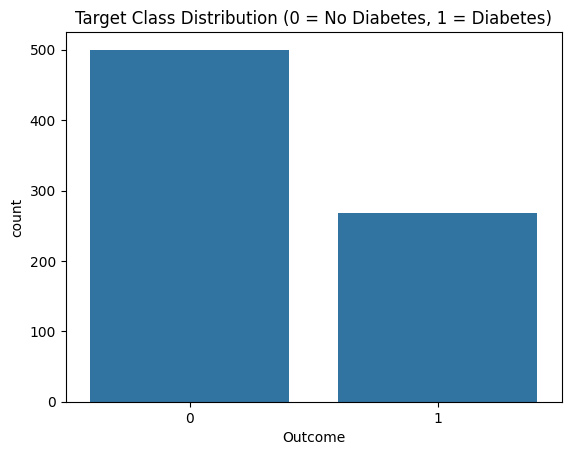

In [28]:
# check variable distribution
sns.countplot(x='Outcome', data=df)
plt.title('Target Class Distribution (0 = No Diabetes, 1 = Diabetes)')

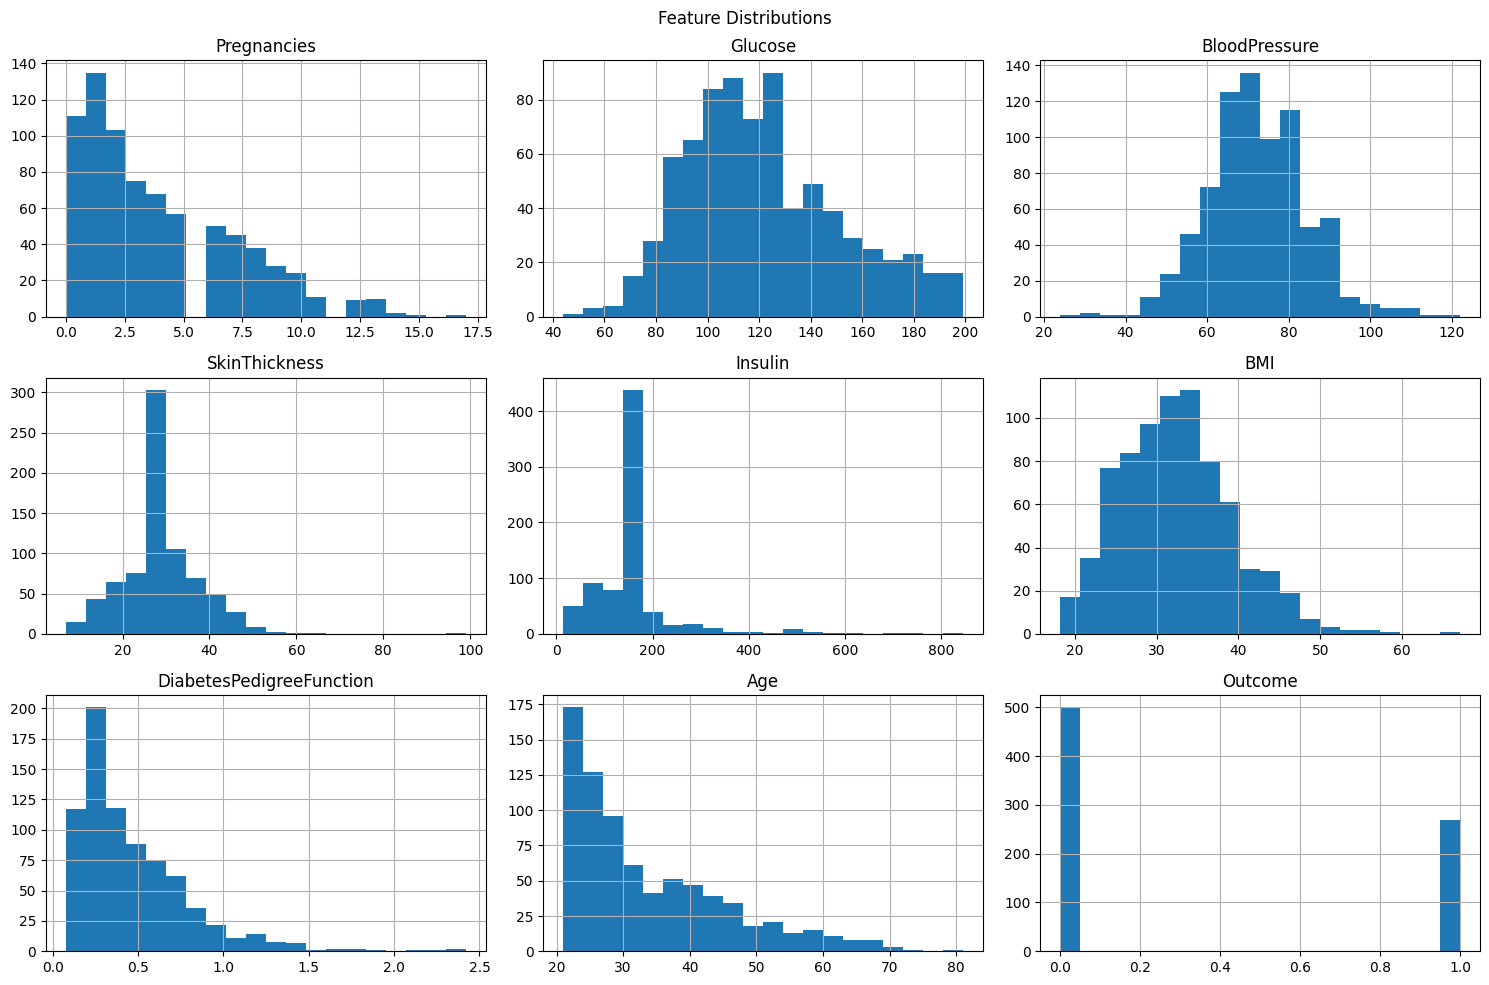

In [29]:
# histogram of each feature
df.hist(bins=20, figsize=(15,10))
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()


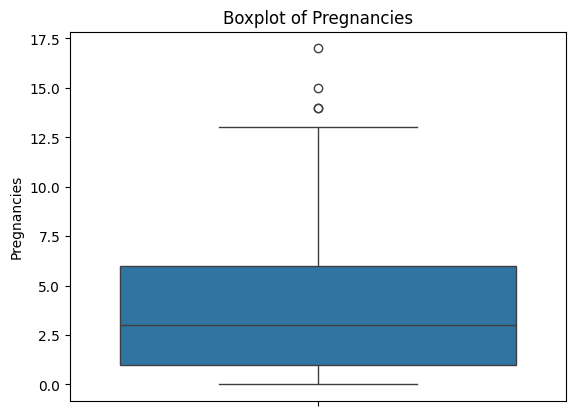

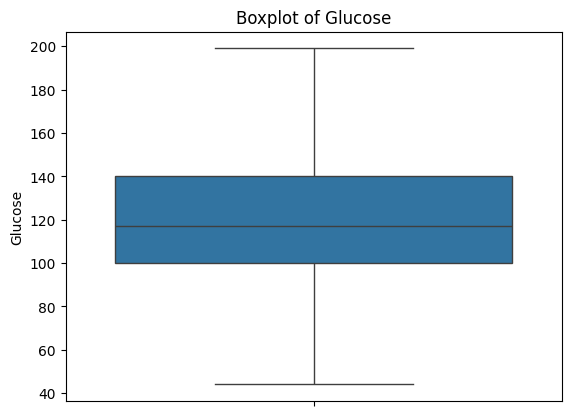

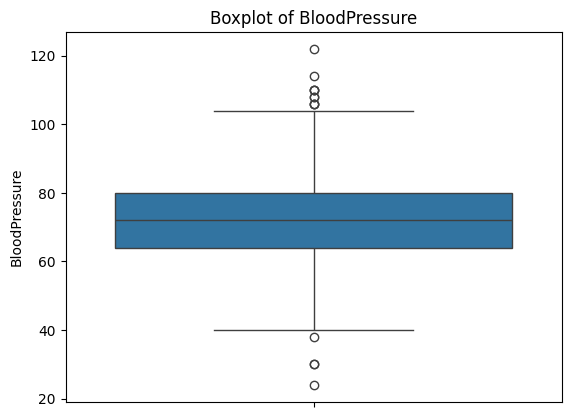

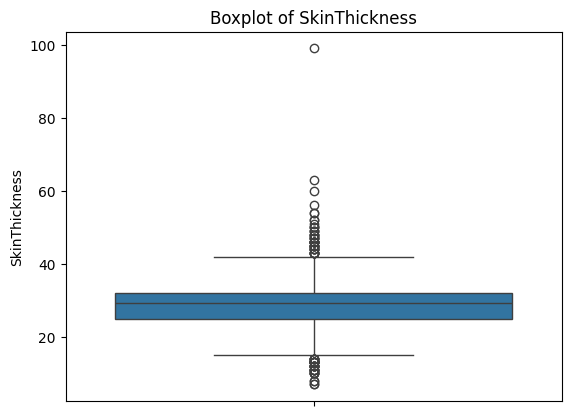

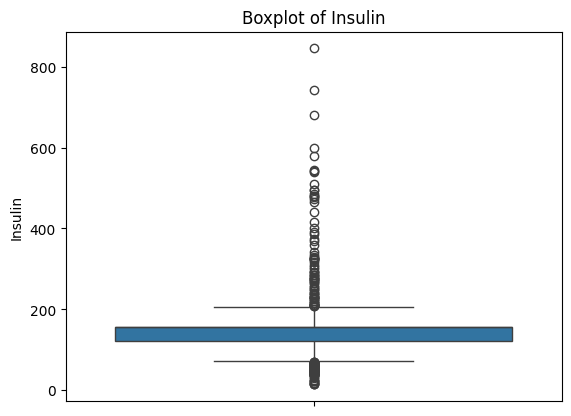

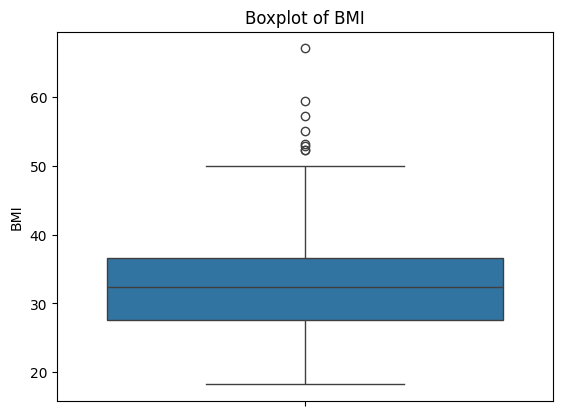

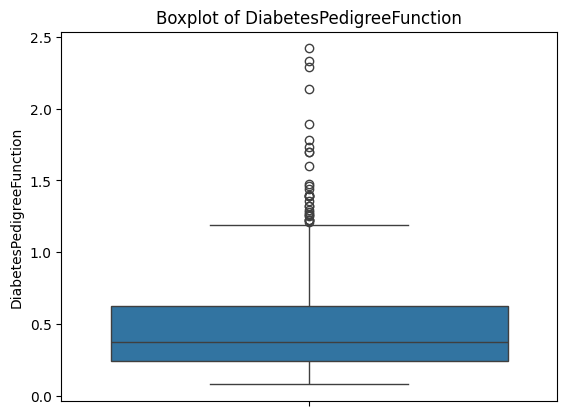

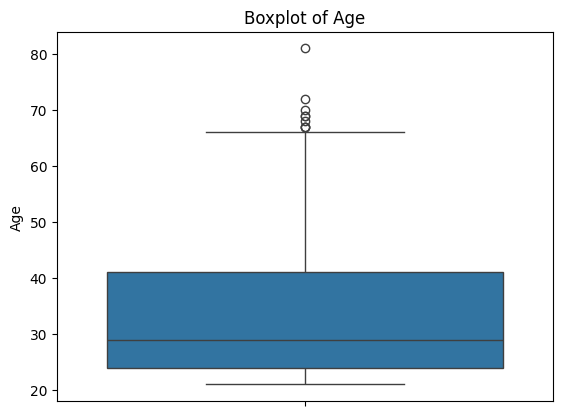

In [30]:
# boxplot for outliers detection
for col in df.columns[:-1]:  # Skip 'Outcome'
    sns.boxplot(y=col, data=df)
    plt.title(f'Boxplot of {col}')
    plt.show()


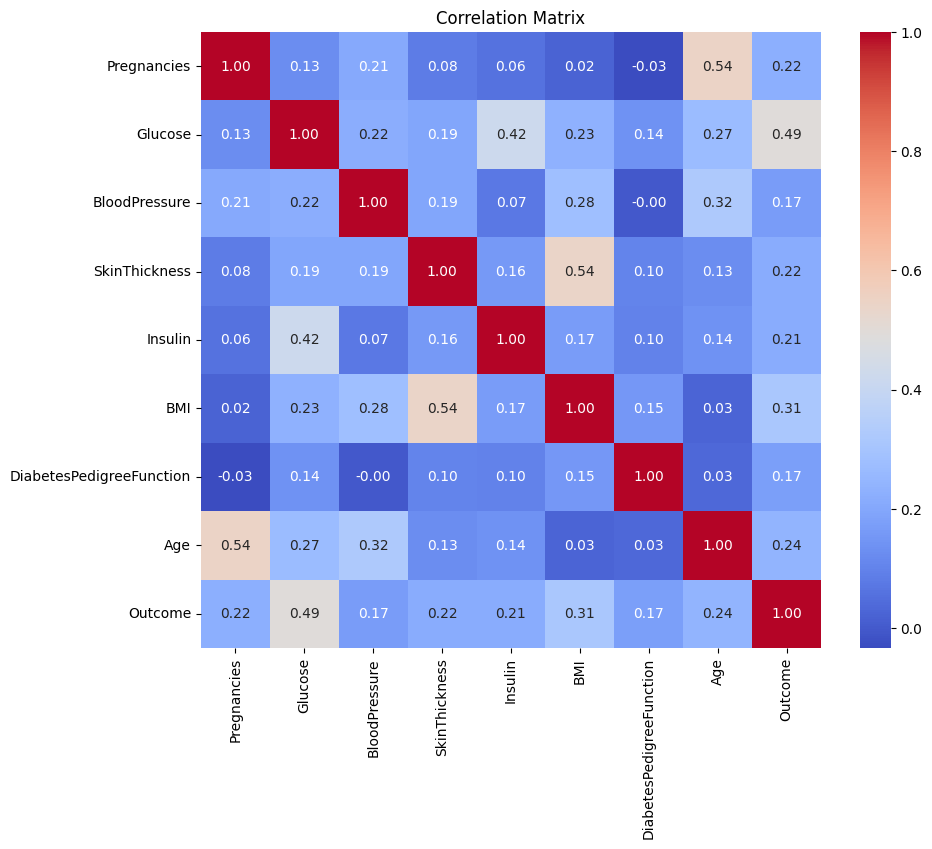

In [31]:
# correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


<Axes: >

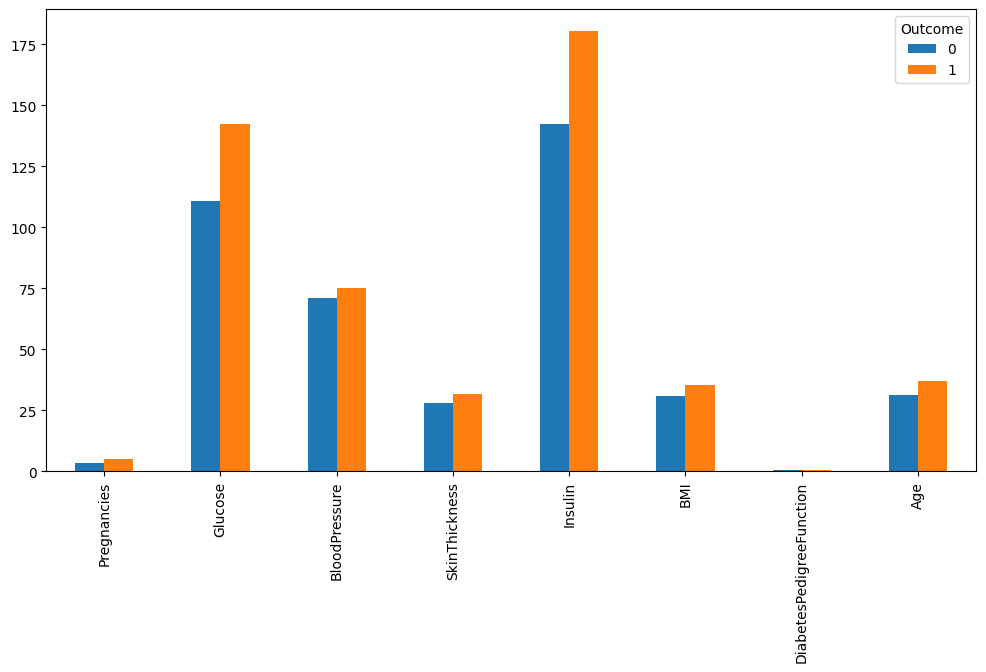

In [33]:
# check the outcome
df.groupby("Outcome").mean().transpose().plot(kind='bar', figsize=(12, 6))
